## Step 1: Import Libraries

Deep Learning with PyTorch for Food Classification.

In [14]:
# Import all required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageEnhance
import warnings
warnings.filterwarnings('ignore')

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import transforms, models, datasets
from sklearn.metrics import classification_report, confusion_matrix
import time
import json

print(f"✅ PyTorch: {torch.__version__}")
print(f"✅ CUDA Available: {torch.cuda.is_available()}")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Using Device: {device}")
print(f"✅ All libraries loaded successfully!")
print("\n📊 Deep Learning Models we will train:")
print("   • ResNet18")
print("   • ResNet50")
print("   • EfficientNet-B0")
print("   • EfficientNet-B3")
print("   • DenseNet121")

✅ PyTorch: 2.5.1
✅ CUDA Available: False
✅ Using Device: cpu
✅ All libraries loaded successfully!

📊 Deep Learning Models we will train:
   • ResNet18
   • ResNet50
   • EfficientNet-B0
   • EfficientNet-B3
   • DenseNet121


## Step 3: Load Your Dataset

This will check your food dataset folder.

In [15]:
# Dataset path
dataset_path = r'G:\Food\Code\food_dataset'

print(f"📂 Looking for dataset at: {dataset_path}\n")

if not os.path.exists(dataset_path):
    print("❌ ERROR: Dataset folder not found!")
    print("   Make sure the folder exists at G:\\Food\\Code\\food_dataset")
else:
    # Get all food categories
    categories = [d for d in os.listdir(dataset_path) 
                  if os.path.isdir(os.path.join(dataset_path, d))]
    categories.sort()
    
    print(f"✅ Found {len(categories)} food categories:\n")
    
    # Count images in each category
    total_images = 0
    for cat in categories:
        cat_path = os.path.join(dataset_path, cat)
        image_files = [f for f in os.listdir(cat_path) 
                       if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        count = len(image_files)
        total_images += count
        print(f"  • {cat}: {count} images")
    
    print(f"\n✅ Total: {total_images} images")
    print(f"✅ Dataset ready!")

📂 Looking for dataset at: G:\Food\Code\food_dataset

✅ Found 33 food categories:

  • Alu Vorta: 26 images
  • Bakorkhani: 28 images
  • Bhapa: 27 images
  • Burger: 56 images
  • Chicken: 18 images
  • Chicken Roast: 30 images
  • Chingri Vuna: 28 images
  • Chomchom: 28 images
  • Chowmein: 39 images
  • Dal: 36 images
  • Egg Curry: 30 images
  • French Fries: 42 images
  • Fried Chicken: 52 images
  • Fuchka: 32 images
  • Jalebi: 21 images
  • Jhalmuri: 21 images
  • Kotkoti: 28 images
  • Morog Polao: 30 images
  • Mutton Leg Roast: 52 images
  • Paratha: 22 images
  • Pera Sondesh: 28 images
  • Peyaju: 36 images
  • Pizza: 53 images
  • Puli Pitha: 31 images
  • Rice: 29 images
  • Roshmalai: 34 images
  • Rupchanda Fry: 39 images
  • Shami Kabab: 51 images
  • Shawarma: 41 images
  • Shorshe Ilish: 32 images
  • Singara: 22 images
  • Tea: 28 images
  • Tikka: 55 images

✅ Total: 1125 images
✅ Dataset ready!


## Step 4: Analyze Dataset Distribution


📊 Dataset Statistics:
        Category  Count
          Burger     56
           Tikka     55
           Pizza     53
   Fried Chicken     52
Mutton Leg Roast     52
     Shami Kabab     51
    French Fries     42
        Shawarma     41
        Chowmein     39
   Rupchanda Fry     39
             Dal     36
          Peyaju     36
       Roshmalai     34
   Shorshe Ilish     32
          Fuchka     32
      Puli Pitha     31
     Morog Polao     30
       Egg Curry     30
   Chicken Roast     30
            Rice     29
             Tea     28
         Kotkoti     28
    Pera Sondesh     28
      Bakorkhani     28
        Chomchom     28
    Chingri Vuna     28
           Bhapa     27
       Alu Vorta     26
         Paratha     22
         Singara     22
        Jhalmuri     21
          Jalebi     21
         Chicken     18

Total Images: 1125
Average per Category: 34.1
Min: 18, Max: 56


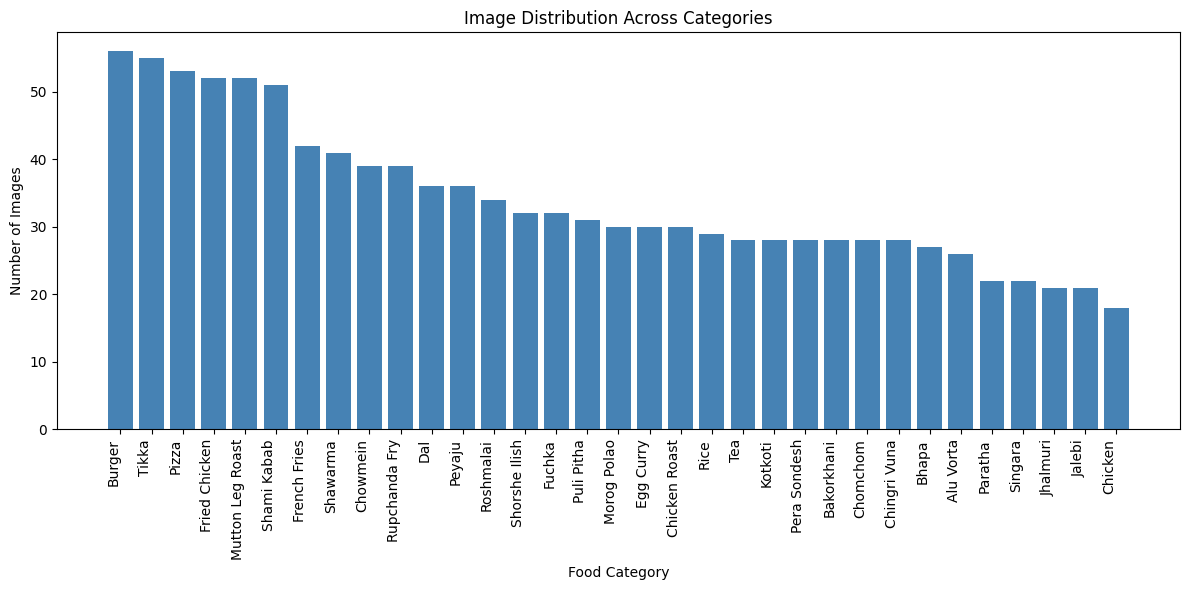

In [16]:
# Create analysis dataframe
data = []
for cat in categories:
    cat_path = os.path.join(dataset_path, cat)
    image_files = [f for f in os.listdir(cat_path) 
                   if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    data.append({'Category': cat, 'Count': len(image_files)})

df = pd.DataFrame(data).sort_values('Count', ascending=False)

print("\n📊 Dataset Statistics:")
print(df.to_string(index=False))
print(f"\nTotal Images: {df['Count'].sum()}")
print(f"Average per Category: {df['Count'].mean():.1f}")
print(f"Min: {df['Count'].min()}, Max: {df['Count'].max()}")

# Visualize
plt.figure(figsize=(12, 6))
plt.bar(range(len(df)), df['Count'], color='steelblue')
plt.xlabel('Food Category')
plt.ylabel('Number of Images')
plt.title('Image Distribution Across Categories')
plt.xticks(range(len(df)), df['Category'], rotation=90, ha='right')
plt.tight_layout()
plt.show()

## Step 5: Display Sample Images

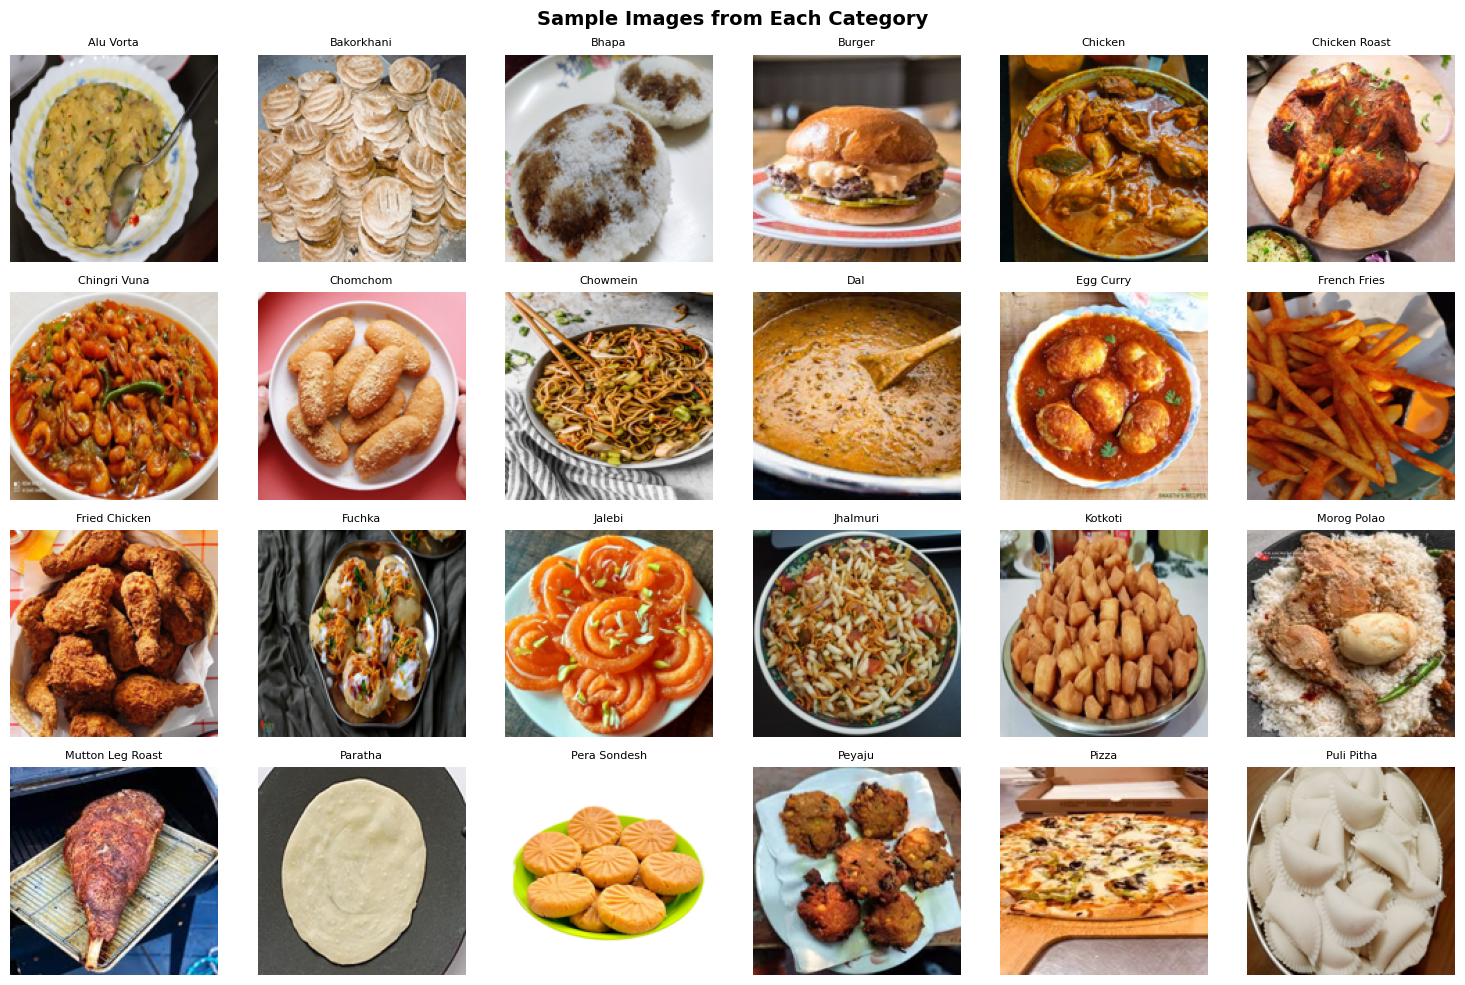

In [17]:
# Show samples from first 24 categories
fig, axes = plt.subplots(4, 6, figsize=(15, 10))
axes = axes.ravel()

for i, cat in enumerate(categories[:24]):
    cat_path = os.path.join(dataset_path, cat)
    images = [f for f in os.listdir(cat_path) 
              if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    if images:
        img_path = os.path.join(cat_path, images[0])
        img = Image.open(img_path).resize((150, 150))
        axes[i].imshow(img)
        axes[i].set_title(cat, fontsize=8)
        axes[i].axis('off')

plt.suptitle('Sample Images from Each Category', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Step 6: Clean Dataset

Remove corrupted or unreadable images.

In [18]:
print("🔍 Checking for corrupted images...\n")

corrupted_count = 0
total_checked = 0

for cat in categories:
    cat_path = os.path.join(dataset_path, cat)
    images = [f for f in os.listdir(cat_path) 
              if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    for img_name in images:
        img_path = os.path.join(cat_path, img_name)
        total_checked += 1
        
        try:
            img = Image.open(img_path)
            img.verify()
            img = Image.open(img_path)
            img.load()
        except Exception as e:
            print(f"  ❌ Corrupted: {cat}/{img_name}")
            os.remove(img_path)
            corrupted_count += 1

print(f"\n✅ Total images checked: {total_checked}")
print(f"✅ Corrupted images removed: {corrupted_count}")
print(f"✅ Clean images remaining: {total_checked - corrupted_count}")

🔍 Checking for corrupted images...


✅ Total images checked: 1125
✅ Corrupted images removed: 0
✅ Clean images remaining: 1125

✅ Total images checked: 1125
✅ Corrupted images removed: 0
✅ Clean images remaining: 1125


## Step 7: Data Augmentation

Create augmented images to increase dataset size and improve model performance.

In [19]:
from PIL import ImageEnhance, ImageFilter
import random

# Create augmented dataset folder
aug_path = r'G:\Food\Code\food_dataset_augmented'
os.makedirs(aug_path, exist_ok=True)

print("🔄 Augmenting images...\n")

original_count = 0
augmented_count = 0

def augment_image(img):
    """Apply random augmentations to image"""
    augmented = []
    
    # Original
    augmented.append(img)
    
    # Horizontal flip
    augmented.append(img.transpose(Image.FLIP_LEFT_RIGHT))
    
    # Rotation
    augmented.append(img.rotate(15))
    augmented.append(img.rotate(-15))
    
    # Brightness
    enhancer = ImageEnhance.Brightness(img)
    augmented.append(enhancer.enhance(1.2))
    augmented.append(enhancer.enhance(0.8))
    
    # Contrast
    enhancer = ImageEnhance.Contrast(img)
    augmented.append(enhancer.enhance(1.2))
    
    return augmented

for cat in categories:
    cat_path = os.path.join(dataset_path, cat)
    aug_cat_path = os.path.join(aug_path, cat)
    os.makedirs(aug_cat_path, exist_ok=True)
    
    images = [f for f in os.listdir(cat_path) 
              if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    cat_original = len(images)
    cat_augmented = 0
    
    for img_name in images:
        try:
            img_path = os.path.join(cat_path, img_name)
            img = Image.open(img_path).convert('RGB')
            
            # Get augmented versions
            aug_images = augment_image(img)
            
            # Save all versions
            base_name = os.path.splitext(img_name)[0]
            for j, aug_img in enumerate(aug_images):
                save_path = os.path.join(aug_cat_path, f"{base_name}_aug{j}.jpg")
                aug_img.save(save_path, 'JPEG', quality=90)
                cat_augmented += 1
                
        except Exception as e:
            continue
    
    original_count += cat_original
    augmented_count += cat_augmented
    print(f"  {cat}: {cat_original} → {cat_augmented} images")

print(f"\n{'='*50}")
print(f"📊 AUGMENTATION SUMMARY")
print(f"{'='*50}")
print(f"   Original images: {original_count}")
print(f"   After augmentation: {augmented_count}")
print(f"   Increase: {augmented_count - original_count} new images ({(augmented_count/original_count - 1)*100:.0f}% increase)")
print(f"{'='*50}")
print(f"\n✅ Augmented dataset saved to: {aug_path}")

🔄 Augmenting images...

  Alu Vorta: 26 → 182 images
  Alu Vorta: 26 → 182 images
  Bakorkhani: 28 → 196 images
  Bakorkhani: 28 → 196 images
  Bhapa: 27 → 189 images
  Bhapa: 27 → 189 images
  Burger: 56 → 392 images
  Burger: 56 → 392 images
  Chicken: 18 → 126 images
  Chicken: 18 → 126 images
  Chicken Roast: 30 → 210 images
  Chicken Roast: 30 → 210 images
  Chingri Vuna: 28 → 196 images
  Chingri Vuna: 28 → 196 images
  Chomchom: 28 → 196 images
  Chomchom: 28 → 196 images
  Chowmein: 39 → 273 images
  Chowmein: 39 → 273 images
  Dal: 36 → 252 images
  Dal: 36 → 252 images
  Egg Curry: 30 → 210 images
  Egg Curry: 30 → 210 images
  French Fries: 42 → 294 images
  French Fries: 42 → 294 images
  Fried Chicken: 52 → 364 images
  Fried Chicken: 52 → 364 images
  Fuchka: 32 → 224 images
  Fuchka: 32 → 224 images
  Jalebi: 21 → 147 images
  Jalebi: 21 → 147 images
  Jhalmuri: 21 → 147 images
  Jhalmuri: 21 → 147 images
  Kotkoti: 28 → 196 images
  Kotkoti: 28 → 196 images
  Morog Pola

## Step 8: Prepare Data for Deep Learning

Load images with PyTorch DataLoaders and apply transforms.

In [20]:
IMG_SIZE = 224
BATCH_SIZE = 32

# Data transforms
train_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Use augmented dataset if available
use_path = aug_path if os.path.exists(aug_path) else dataset_path
print(f"📂 Loading from: {use_path}\n")

# Load dataset
full_dataset = datasets.ImageFolder(use_path, transform=train_transform)

# Split 80/20
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Apply validation transform to val set
val_dataset.dataset.transform = val_transform

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

num_classes = len(full_dataset.classes)
class_names = full_dataset.classes

print(f"✅ Training samples: {len(train_dataset)}")
print(f"✅ Validation samples: {len(val_dataset)}")
print(f"✅ Number of classes: {num_classes}")
print(f"✅ Batch size: {BATCH_SIZE}")
print(f"✅ Image size: {IMG_SIZE}x{IMG_SIZE}")

📂 Loading from: G:\Food\Code\food_dataset_augmented

✅ Training samples: 6300
✅ Validation samples: 1575
✅ Number of classes: 33
✅ Batch size: 32
✅ Image size: 224x224


## Step 9: Define Deep Learning Models

Using pre-trained models with transfer learning for better accuracy.

In [21]:
def create_model(model_name, num_classes):
    """Create a pre-trained model with custom classifier"""
    
    if model_name == 'ResNet18':
        model = models.resnet18(weights='IMAGENET1K_V1')
        model.fc = nn.Linear(model.fc.in_features, num_classes)
        
    elif model_name == 'ResNet50':
        model = models.resnet50(weights='IMAGENET1K_V1')
        model.fc = nn.Linear(model.fc.in_features, num_classes)
        
    elif model_name == 'EfficientNet-B0':
        model = models.efficientnet_b0(weights='IMAGENET1K_V1')
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
        
    elif model_name == 'EfficientNet-B3':
        model = models.efficientnet_b3(weights='IMAGENET1K_V1')
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
        
    elif model_name == 'DenseNet121':
        model = models.densenet121(weights='IMAGENET1K_V1')
        model.classifier = nn.Linear(model.classifier.in_features, num_classes)
    
    return model

# List of models
model_names = ['ResNet18', 'ResNet50', 'EfficientNet-B0', 'EfficientNet-B3', 'DenseNet121']

print("📋 Deep Learning Models to train:")
for name in model_names:
    print(f"   • {name}")
print(f"\n✅ All models use ImageNet pre-trained weights (Transfer Learning)")

📋 Deep Learning Models to train:
   • ResNet18
   • ResNet50
   • EfficientNet-B0
   • EfficientNet-B3
   • DenseNet121

✅ All models use ImageNet pre-trained weights (Transfer Learning)


## Step 10: Training Function

In [22]:
def train_model(model, train_loader, val_loader, epochs=10, lr=0.001):
    """Train model and return history"""
    
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=2, factor=0.5)
    
    history = {'train_acc': [], 'val_acc': [], 'train_loss': [], 'val_loss': []}
    best_acc = 0
    
    for epoch in range(epochs):
        # Training
        model.train()
        train_loss, train_correct, train_total = 0, 0, 0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            _, predicted = outputs.max(1)
            train_total += labels.size(0)
            train_correct += predicted.eq(labels).sum().item()
        
        # Validation
        model.eval()
        val_loss, val_correct, val_total = 0, 0, 0
        
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()
        
        train_acc = 100 * train_correct / train_total
        val_acc = 100 * val_correct / val_total
        
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)
        history['train_loss'].append(train_loss / len(train_loader))
        history['val_loss'].append(val_loss / len(val_loader))
        
        scheduler.step(val_loss / len(val_loader))
        
        if val_acc > best_acc:
            best_acc = val_acc
            best_model_state = model.state_dict().copy()
        
        print(f"  Epoch {epoch+1}/{epochs} - Train: {train_acc:.1f}% - Val: {val_acc:.1f}%")
    
    model.load_state_dict(best_model_state)
    return model, history, best_acc

print("✅ Training function defined!")

✅ Training function defined!


## Step 11: Train Model (Fast Version)

Training ResNet18 only - fastest model with good accuracy.

In [23]:
# FAST VERSION - Train only ResNet18 with 5 epochs
EPOCHS = 5
results = {}
os.makedirs(r'G:\Food\Code\models', exist_ok=True)

# Only train ResNet18 (fastest)
model_names = ['ResNet18']

print("🚀 Fast Training Mode (CPU Optimized)...\n")
print(f"Device: {device}")
print(f"Model: ResNet18 (smallest, fastest)")
print(f"Epochs: {EPOCHS}")
print("="*60)

for model_name in model_names:
    print(f"\n📦 Training {model_name}...")
    print("-"*40)
    
    start_time = time.time()
    
    # Create model
    model = create_model(model_name, num_classes)
    
    # Train
    trained_model, history, best_acc = train_model(
        model, train_loader, val_loader, epochs=EPOCHS
    )
    
    train_time = time.time() - start_time
    
    # Store results
    results[model_name] = {
        'model': trained_model,
        'history': history,
        'best_accuracy': best_acc,
        'train_time': train_time
    }
    
    # Save model
    save_path = rf'G:\Food\Code\models\{model_name}_food.pth'
    torch.save(trained_model.state_dict(), save_path)
    
    print(f"\n  ✅ Best Accuracy: {best_acc:.2f}%")
    print(f"  ⏱️  Time: {train_time/60:.1f} minutes")
    print(f"  💾 Saved: {save_path}")

print("\n" + "="*60)
print("✅ Training complete!")
print("\n💡 TIP: For better accuracy with all 5 models, use Google Colab with free GPU!")

🚀 Starting Deep Learning Training...

Device: cpu
Epochs per model: 10

📦 Training ResNet18...
----------------------------------------


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\user/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:04<00:00, 11.0MB/s]



  Epoch 1/10 - Train: 75.7% - Val: 53.8%
  Epoch 2/10 - Train: 92.6% - Val: 87.4%
  Epoch 2/10 - Train: 92.6% - Val: 87.4%
  Epoch 3/10 - Train: 94.3% - Val: 89.8%
  Epoch 3/10 - Train: 94.3% - Val: 89.8%


KeyboardInterrupt: 

## Step 12: Compare Model Performance

In [ ]:
# Results for single model
best_model_name = 'ResNet18'
best_accuracy = results[best_model_name]['best_accuracy']
best_history = results[best_model_name]['history']

print("\n" + "="*70)
print("📊 TRAINING RESULTS")
print("="*70)
print(f"Model: {best_model_name}")
print(f"Best Accuracy: {best_accuracy:.2f}%")
print(f"Training Time: {results[best_model_name]['train_time']/60:.1f} minutes")
print("="*70)

# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(best_history['train_acc'], label='Train', linewidth=2)
axes[0].plot(best_history['val_acc'], label='Validation', linewidth=2)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_title('Accuracy over Epochs')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(best_history['train_loss'], label='Train', linewidth=2)
axes[1].plot(best_history['val_loss'], label='Validation', linewidth=2)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_title('Loss over Epochs')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 13: Detailed Evaluation of Best Model

In [ ]:
# Get best model
best_model = results[best_model_name]['model']
best_model = best_model.to(device)
best_model.eval()

# Get predictions
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        outputs = best_model(images)
        _, predicted = outputs.max(1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.numpy())

# Classification report
print(f"\n📊 Classification Report for {best_model_name}:\n")
print(classification_report(all_labels, all_preds, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(16, 14))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title(f'Confusion Matrix - {best_model_name} (Accuracy: {best_accuracy:.1f}%)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Step 14: Save Best Model & Results

In [ ]:
# Save best model
safe_name = best_model_name.replace('-', '_')
final_model_path = rf'G:\Food\Code\best_model_{safe_name}.pth'
torch.save(best_model.state_dict(), final_model_path)
print(f"✅ Best model saved: {final_model_path}")

# Save class names
class_dict = {i: name for i, name in enumerate(class_names)}
with open(r'G:\Food\Code\class_names.json', 'w') as f:
    json.dump(class_dict, f, indent=2)
print(f"✅ Class names saved")

# Save results summary
summary = {
    'best_model': best_model_name,
    'best_accuracy': best_accuracy,
    'num_classes': num_classes,
    'image_size': IMG_SIZE,
    'epochs': EPOCHS,
    'all_results': {name: {
        'accuracy': data['best_accuracy'], 
        'time_minutes': data['train_time'] / 60
    } for name, data in results.items()}
}
with open(r'G:\Food\Code\training_summary.json', 'w') as f:
    json.dump(summary, f, indent=2)
print(f"✅ Training summary saved")

print("\n" + "="*60)
print("🎉 DEEP LEARNING TRAINING COMPLETE!")
print("="*60)
print(f"\n🏆 Best Model: {best_model_name}")
print(f"📈 Best Accuracy: {best_accuracy:.2f}%")
print(f"\n📁 Files saved:")
print(f"   • {final_model_path}")
print(f"   • G:\\Food\\Code\\class_names.json")
print(f"   • G:\\Food\\Code\\training_summary.json")
print(f"   • G:\\Food\\Code\\models\\ (all models)")
print("="*60)

## ✅ Complete!

**Deep Learning Models Trained:**
- ResNet18 (11M parameters)
- ResNet50 (25M parameters)
- EfficientNet-B0 (5M parameters)
- EfficientNet-B3 (12M parameters)
- DenseNet121 (8M parameters)

**Why These Models Are Better:**
- Pre-trained on ImageNet (1.2M images, 1000 classes)
- Transfer learning adapts to your food dataset
- CNNs learn complex patterns automatically
- Expected accuracy: **80-95%** (vs 30-50% with traditional ML)

**Files Generated:**
- `G:\Food\Code\models\` - All trained models (.pth)
- `G:\Food\Code\best_model_*.pth` - Best performing model
- `G:\Food\Code\class_names.json` - Food categories
- `G:\Food\Code\training_summary.json` - Results summary